This is purposefully a pretty quick and poorly-performing test, since we are not really training models for very long. Make sure you can run everything here successfully to get familiar with the BioAutoMATED platform!

In [1]:
import sys
sys.path.insert(1, './BioAutoMATED/main_classes/')
sys.path.append('./BioAutoMATED')
import warnings
warnings.filterwarnings("ignore")
from wrapper import run_bioautomated
import shutil
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# make directory where these results can live - no need to run if already have a directory
#os.mkdir('./exemplars/')

Using TensorFlow backend.


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

False

# General Parameters (can be changed)

### input arguments 
- task : str, one of 'binary_classification', 'multiclass_classification', 'regression'
- data_folder : str representing folder where data is stored
- data_file : str representing file name where data is stored
- sequence_type : str, either 'nucleic_acid', 'peptide', or 'glycan'
- model_folder : str representing folder where models are to be stored
- output_folder : str representing folder where output is to be stored
- automl_search_techniques : str representing which AutoML search technique should be performed, one of 'all', 'deepswarm', 'autokeras', 'tpot'
- do_backup : bool representing if a backup should be performed
- max_runtime_minutes : int representing max runtime for model search in minutes
- num_folds : int representing num folds
- verbosity : int representing 0=not verbose, 1=verbose
- do_auto_bin : bool representing if target values should be automatically binned
- bin_threshold : float representing threshold for positive and negative classes
- do_transform : bool representing if target values should be transformed
- input_col : str representing input column name where sequences can be located
- target_col : str representing target column name where target values can be located
- pad_seqs : str indicating pad_seqs method, either 'max', 'min', 'average'
- augment_data : str, either 'none', 'complement', 'reverse_complement', or 'both_complements'
- dataset_robustness : bool indicating if data ablation study should be performed
- num_final_epochs : int representing number of final epochs to train final deepswarm model
- yaml_params : dict of extra deepswarm parameters, with keys 'max_depth' (int), 'ant_count' (int), 'epochs' (int)
- num_generations : int representing number of generations of tpot search
- population_size : int representing population size of tpot search
- run_interpretation : bool indicating if interpretation module should be executed
- interpret_params : dict of extra interpretation parameters, with keys 'sample_number_class_activation_maps' (int), 'class_activation_grad_modifier' (str), 'class_activation_layer_index' (int), 'sample_number_saliency_maps' (int), 'saliency_map_grad_modifier' (str), 'saliency_map_layer_index' (int), 'sample_number_mutagenesis' (int)
- run_design : bool indicating if design module should be executed
- design_params : dict of extra design parameters, with keys 'k' (int), 'substitution_type' (str), 'target_y' (float), 'class_of_interest' (int), 'constraint_file_path' (str), 'de_novo_num_seqs_to_test' (int), 'storm_num_seqs_to_test' (int), 'num_of_optimization_rounds' (int)

In [3]:
# specify parameters for the actual search (example)
max_runtime_minutes = 60 # time in minutes to give to each implemented AutoML algorithms
num_folds = 2 # recommend 3 - 5 folds for robustness

# Deepswarm execution
num_final_epochs = 10
yaml_params = {'ant_count': 1, 'max_depth': 2, 'epochs': 5}

# TPOT execution
num_generations = 5
population_size = 5

Note that this runtime (10 minutes) may be too short for your machine's computing capabilites (see note under Troubleshooting in the Installation Guide). If so, please change max_runtime_minutes to 60. Make sure to reset the graph operations of BioAutoMATED by restarting the kernel (Kernel --> Restart) before trying to run again.

# Synthetic Nucleic Acids Dataset

Verbosity set to 1. For fewer display items, set verbosity to 0.
#################################################################################################
#######################               RUNNING REGRESSION                  #######################
#################################################################################################

#################################################################################################
##############################            RUNNING DEEPSWARM           ###########################
#################################################################################################
Conducting architecture search now...
Confirmed: All sequence characters are in alphabet
Padding all sequences to a length of 212
Confirmed: No data augmentation requested


-------------------------------DeepSwarm settings-------------------------------
{
    "DeepSwarm": {
        "aco": {
            "ant_count": 1,
            "greediness": 0.5,
            "pheromone": {
                "decay": 0.1,
                "evaporation": 0.1,
                "start": 0.1,
                "verbose": false
            }
        },
        "backend": {
            "batch_size": 64,
            "epochs": 5,
            "loss": "mean_squared_error",
            "patience": 5,
            "verbose": 1
        },
        "flat_nodes": [
            "FlattenNode",
            "DenseNode",
            "DropoutFlatNode",
            "BatchNormalizationFlatNode"
        ],
        "max_depth": 2,
        "metrics": "loss",
        "reuse_patience": 1,
        "save_folder": "./wenxiao1117/output/R_CDS/models/deepswarm/regression/",
        "spatial_nodes": [
            "InputNode",
            "Conv2DNode",
            "DropoutSpatialNode",
            "BatchNormaliza

Confirmed: Scrambled control generated.
Deepswarm TFK Backend: Created!
Deepswarm Object: Created!


------------------------------STARTING ACO SEARCH-------------------------------


Train on 333 samples, validate on 37 samples
Epoch 1/5
 64/333 [====>.........................] - ETA: 0s - loss: 0.3317 - mean_squared_error: 0.3317
Epoch 00001: val_loss improved from inf to 0.38938, saving model to temp-model
333/333 [==============================] - 0s 548us/sample - loss: 0.3884 - mean_squared_error: 0.3884 - val_loss: 0.3894 - val_mean_squared_error: 0.3894
Epoch 2/5
 64/333 [====>.........................] - ETA: 0s - loss: 0.3695 - mean_squared_error: 0.3695
Epoch 00002: val_loss improved from 0.38938 to 0.36379, saving model to temp-model
333/333 [==============================] - 1s 2ms/sample - loss: 0.2714 - mean_squared_error: 0.2714 - val_loss: 0.3638 - val_mean_squared_error: 0.3638
Epoch 3/5
 64/333 [====>.........................] - ETA: 0s - loss: 0.1533 - mean_squared_error: 0.1533
Epoch 00003: val_loss improved from 0.36379 to 0.34931, saving model to temp-model
333/333 [==============================] - 0s 139us/sample - loss: 0.2369 - mean_square

 Ant: 0x7ff7fd3d0850 
 Loss: 0.309976 
 Accuracy: 0.309976 
 Path: InputNode(shape:(212, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:32, kernel_size:1) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: c388815c401aac4686f55e316b66ddb82598e2e3516008ad6b61d79e3d8ae041 
---------------------------Current search depth is 1----------------------------
--------------------------------GENERATING ANT 1--------------------------------


Train on 333 samples, validate on 37 samples
Epoch 1/5
 64/333 [====>.........................] - ETA: 0s - loss: 0.3123 - mean_squared_error: 0.3123
Epoch 00001: val_loss improved from inf to 0.50219, saving model to temp-model
333/333 [==============================] - 0s 519us/sample - loss: 0.3759 - mean_squared_error: 0.3759 - val_loss: 0.5022 - val_mean_squared_error: 0.5022
Epoch 2/5
 64/333 [====>.........................] - ETA: 0s - loss: 0.3568 - mean_squared_error: 0.3568
Epoch 00002: val_loss improved from 0.50219 to 0.40863, saving model to temp-model
333/333 [==============================] - 0s 111us/sample - loss: 0.3131 - mean_squared_error: 0.3131 - val_loss: 0.4086 - val_mean_squared_error: 0.4086
Epoch 3/5
 64/333 [====>.........................] - ETA: 0s - loss: 0.2655 - mean_squared_error: 0.2655
Epoch 00003: val_loss did not improve from 0.40863
333/333 [==============================] - 0s 75us/sample - loss: 0.2616 - mean_squared_error: 0.2616 - val_loss: 0.4

 Ant: 0x7ff822c78d50 
 Loss: 0.307899 
 Accuracy: 0.307899 
 Path: InputNode(shape:(212, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 16369a8f309f7927a698126d35ed447d37ddee176b083e4bf35d22bc5164ffd4 
-------------------------------NEW BEST ANT FOUND-------------------------------
---------------------------BEST ANT DURING ITERATION----------------------------
 Ant: 0x7ff822c78d50 
 Loss: 0.307899 
 Accuracy: 0.307899 
 Path: InputNode(shape:(212, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 16369a8f309f7927a698126d35ed447d37ddee176b083e4bf35d22bc5164ffd4 
---------------------------Current search depth is 2----------------------------
--------------------------------GENERATING ANT 1--------------------------------


Train on 333 samples, validate on 37 samples
Epoch 1/5
 64/333 [====>.........................] - ETA: 0s - loss: 0.5216 - mean_squared_error: 0.5216
Epoch 00001: val_loss improved from inf to 0.40857, saving model to temp-model
333/333 [==============================] - 0s 622us/sample - loss: 0.3952 - mean_squared_error: 0.3952 - val_loss: 0.4086 - val_mean_squared_error: 0.4086
Epoch 2/5
 64/333 [====>.........................] - ETA: 0s - loss: 0.5267 - mean_squared_error: 0.5267
Epoch 00002: val_loss improved from 0.40857 to 0.39056, saving model to temp-model
333/333 [==============================] - 1s 4ms/sample - loss: 0.3578 - mean_squared_error: 0.3578 - val_loss: 0.3906 - val_mean_squared_error: 0.3906
Epoch 3/5
 64/333 [====>.........................] - ETA: 0s - loss: 0.2846 - mean_squared_error: 0.2846
Epoch 00003: val_loss did not improve from 0.39056
333/333 [==============================] - 0s 71us/sample - loss: 0.3295 - mean_squared_error: 0.3295 - val_loss: 0.395

 Ant: 0x7ff7f4665390 
 Loss: 0.365615 
 Accuracy: 0.365615 
 Path: InputNode(shape:(212, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:5) -> Pool2DNode(pool_size:2, pool_type:max, stride:3) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: c5595e96981cf5e61ae66f6bc5a6a20ecd06fc772f2d83383a2111d42036906f 
---------------------------BEST ANT DURING ITERATION----------------------------
 Ant: 0x7ff822c78d50 
 Loss: 0.307899 
 Accuracy: 0.307899 
 Path: InputNode(shape:(212, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 16369a8f309f7927a698126d35ed447d37ddee176b083e4bf35d22bc5164ffd4 


Deepswarm Topology: Found!


-----------------------EVALUATING PERFORMANCE ON TEST SET-----------------------


248/248 [==============================] - ETA: 0s - loss: 0.2656 - mean_squared_error: 0.26 - 0s 139us/sample - loss: 0.3079 - mean_squared_error: 0.3079


Accuracy is 0.307899 and loss is 0.307899


Deepswarm Preliminary Topology Evaluation: Done!
248/248 [==============================] - ETA: 0s - loss: 0.2656 - mean_squared_error: 0.26 - 0s 37us/sample - loss: 0.3079 - mean_squared_error: 0.3079
Epoch 1/10
37/37 [==============================] ETA: 0s - loss: 0.3298 - mean_squared_error: 0.3298 - 0s 59us/sample - loss: 0.2311 - mean_squared_error: 0.2311

Epoch 00001: val_loss improved from inf to 0.23106, saving model to temp-model
6/6 [==============================] - 0s 27ms/step - loss: 0.2508 - mean_squared_error: 0.2529 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 2/10
37/37 [==============================] ETA: 0s - loss: 0.2029 - mean_squared_error: 0.2029 - 0s 53us/sample - loss: 0.3058 - mean_squared_error: 0.3058

Epoch 00002: val_loss did not improve from 0.23106
6/6 [==============================] - 0s 5ms/step - loss: 0.2349 - mean_squared_error: 0.2488 - val_loss: 0.3058 - val_mean_squared_error: 0.3058
Epoch 3/10
37/37 [==========================

-----------------------EVALUATING PERFORMANCE ON TEST SET-----------------------


248/248 [==============================] - ETA: 0s - loss: 0.2542 - mean_squared_error: 0.25 - 0s 133us/sample - loss: 0.3042 - mean_squared_error: 0.3042


Accuracy is 0.304247 and loss is 0.304247


Deepswarm Topology Evaluation: Completed!
Deepswarm Results: Saved!
Current fold: 1
Train on 278 samples, validate on 31 samples
Epoch 1/10
278/278 [==============================] - ETA: 0s - loss: 0.4118 - mean_squared_error: 0.41 - 0s 486us/sample - loss: 0.2628 - mean_squared_error: 0.2628 - val_loss: 0.3640 - val_mean_squared_error: 0.3640
Epoch 2/10
278/278 [==============================] - ETA: 0s - loss: 0.2008 - mean_squared_error: 0.20 - 0s 102us/sample - loss: 0.2279 - mean_squared_error: 0.2279 - val_loss: 0.2186 - val_mean_squared_error: 0.2186
Epoch 3/10
309/309 [==============================] - ETA: 0s - loss: 0.2601 - mean_squared_error: 0.26 - 0s 36us/sample - loss: 0.3018 - mean_squared_error: 0.3018


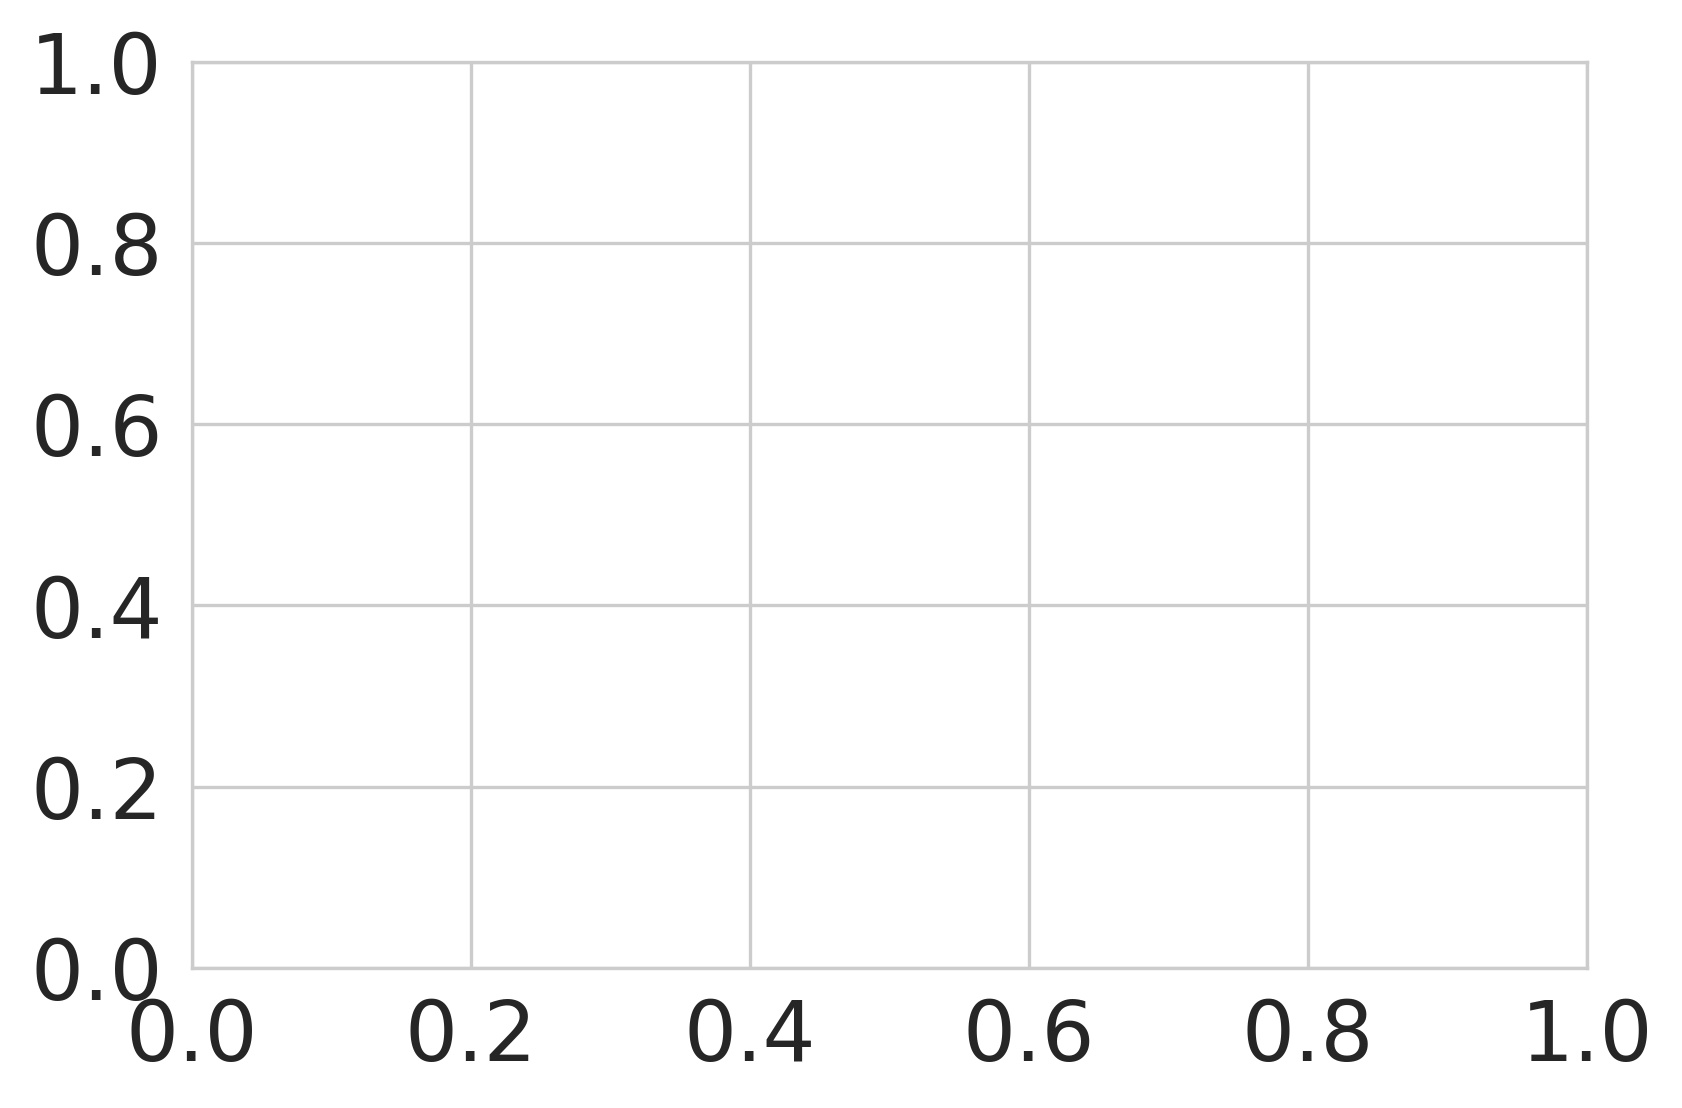

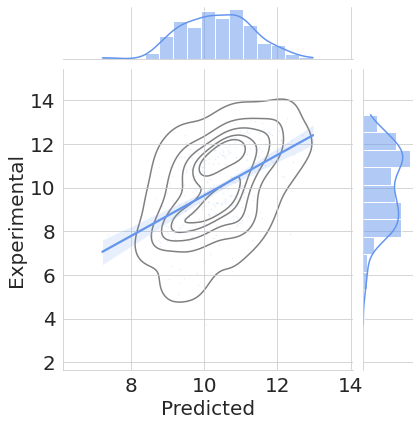

Current fold: 2
Train on 278 samples, validate on 31 samples
Epoch 1/10
278/278 [==============================] - ETA: 0s - loss: 0.3073 - mean_squared_error: 0.30 - 0s 534us/sample - loss: 0.3110 - mean_squared_error: 0.3110 - val_loss: 0.1919 - val_mean_squared_error: 0.1919
Epoch 2/10
309/309 [==============================] - ETA: 0s - loss: 0.2085 - mean_squared_error: 0.20 - 0s 36us/sample - loss: 0.2338 - mean_squared_error: 0.2338


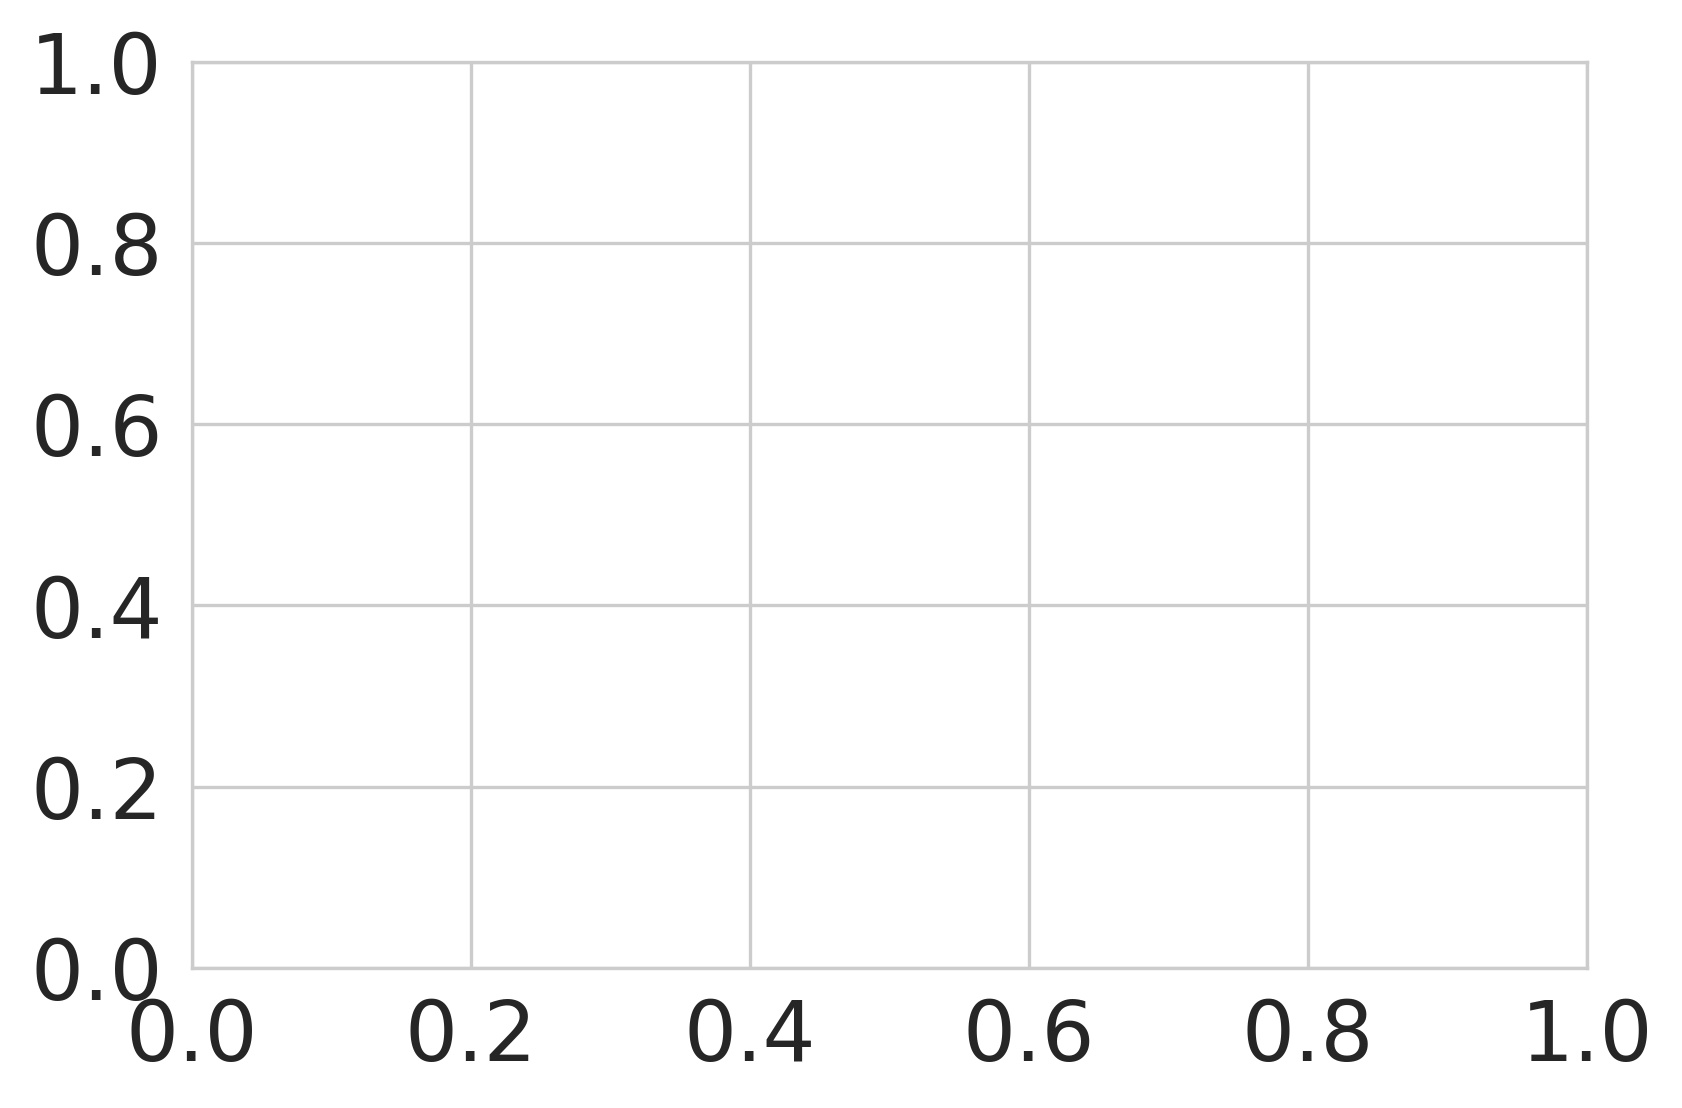

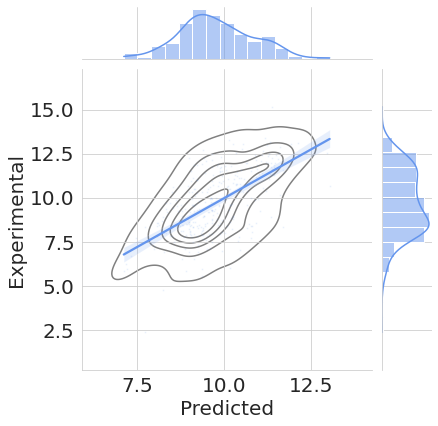

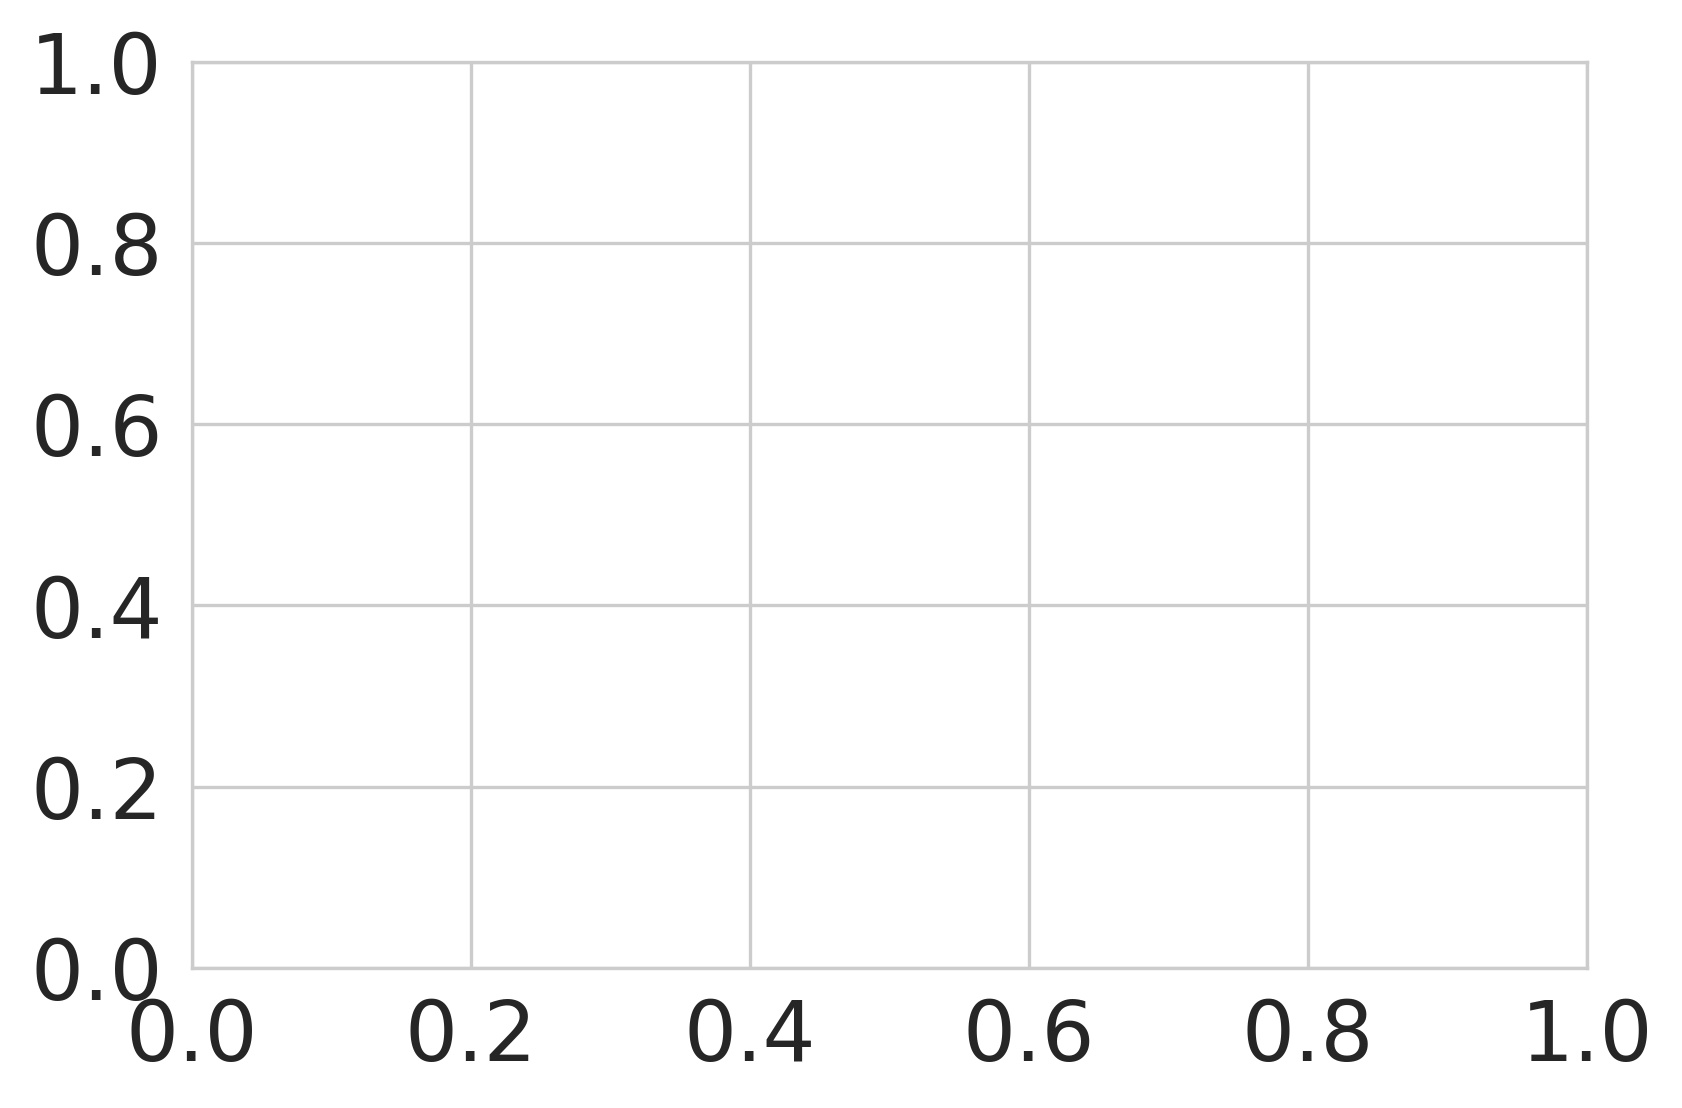

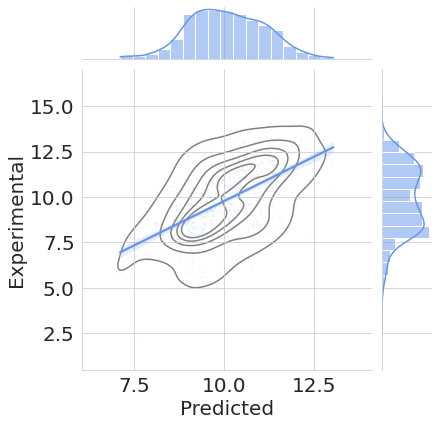

Metrics over folds: 
	Average r2:  0.31513160228784437
	Std of r2:  0.08196838611888868
	Overall r2: 0.3082797484184932, Average r2 over folds: 0.31513160228784437
Testing scrambled control now...
Current fold: 1
Train on 278 samples, validate on 31 samples
Epoch 1/10
278/278 [==============================] - 0s 582us/sample - loss: 0.4170 - mean_squared_error: 0.4170 - val_loss: 0.3838 - val_mean_squared_error: 0.3838
Epoch 2/10
309/309 [==============================] - 0s 36us/sample - loss: 0.3893 - mean_squared_error: 0.3893


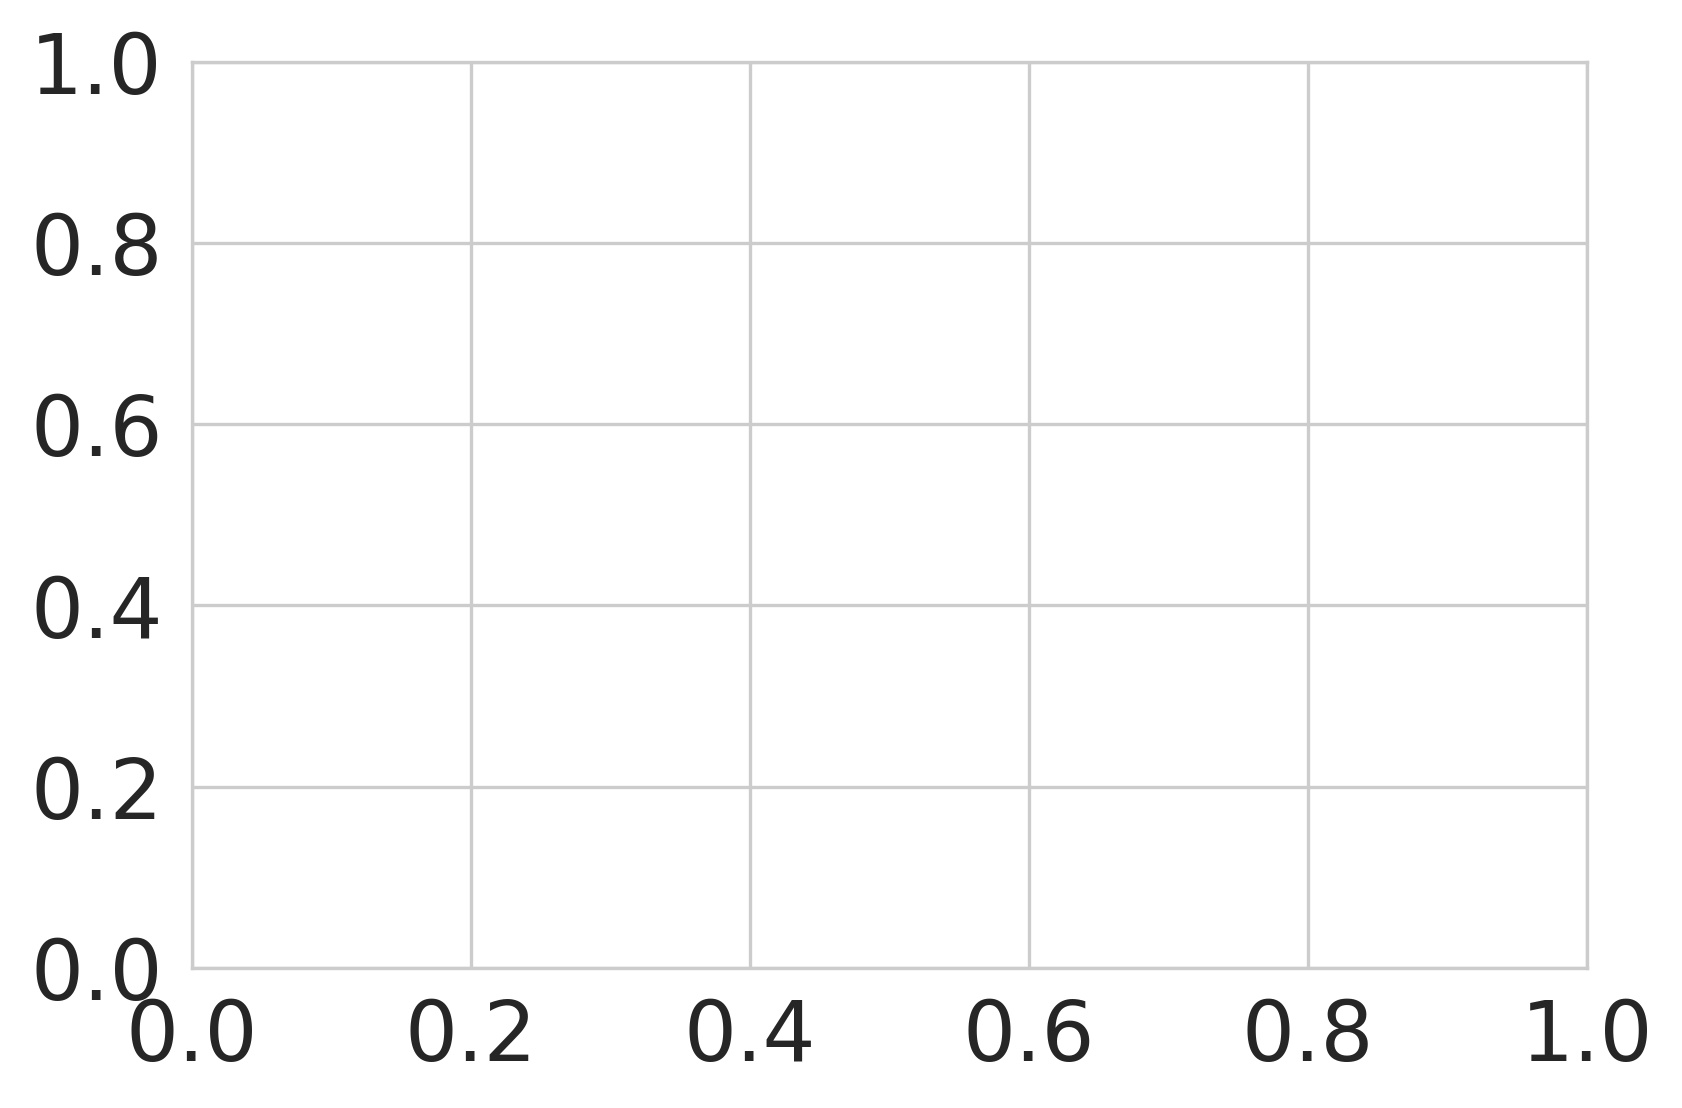

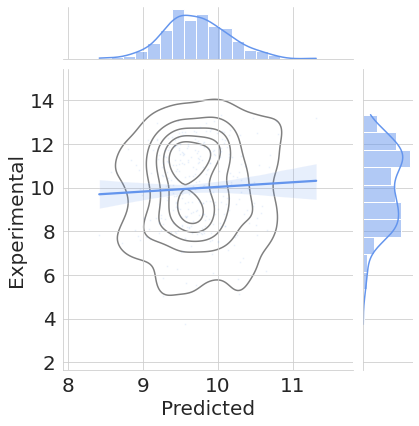

Current fold: 2
Train on 278 samples, validate on 31 samples
Epoch 1/10
278/278 [==============================] - 0s 646us/sample - loss: 0.3864 - mean_squared_error: 0.3864 - val_loss: 0.3752 - val_mean_squared_error: 0.3752
Epoch 2/10
278/278 [==============================] - 0s 94us/sample - loss: 0.2458 - mean_squared_error: 0.2458 - val_loss: 0.3448 - val_mean_squared_error: 0.3448
Epoch 3/10
309/309 [==============================] - 0s 36us/sample - loss: 0.4359 - mean_squared_error: 0.4359


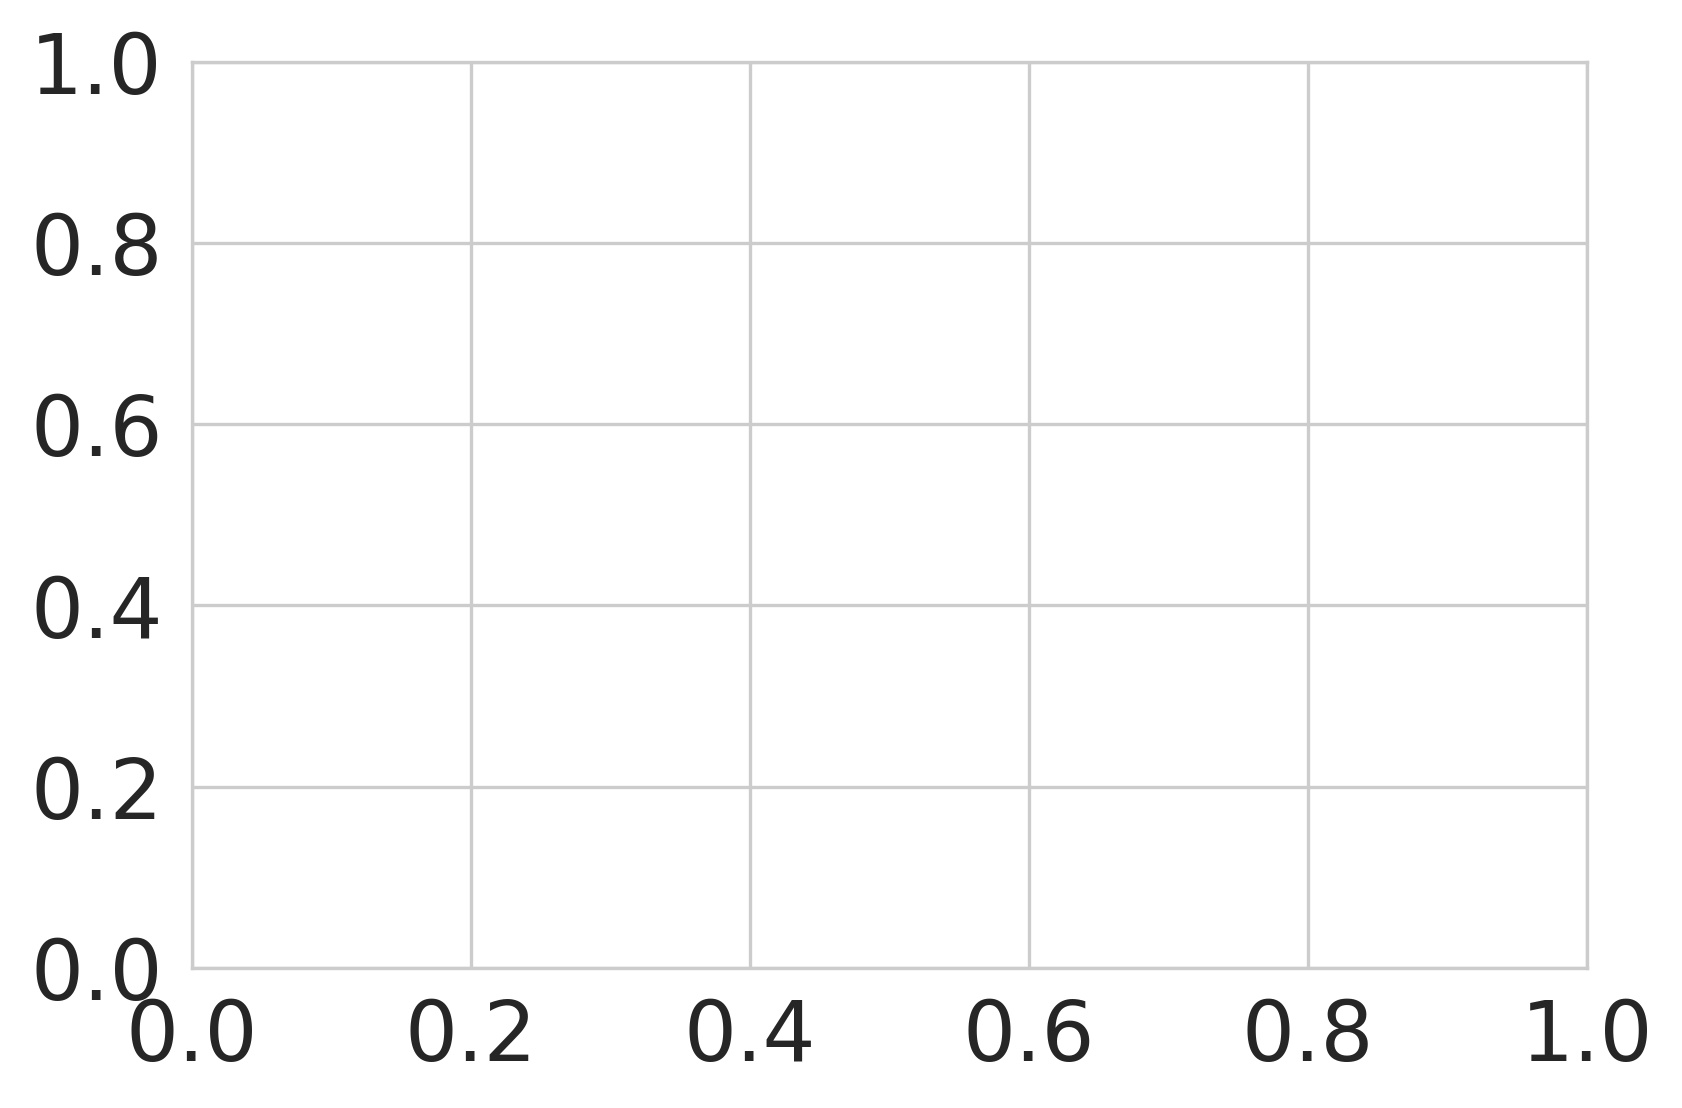

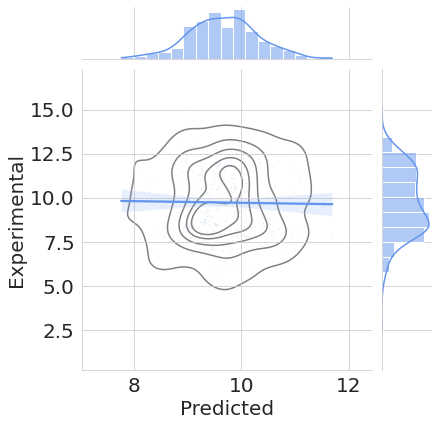

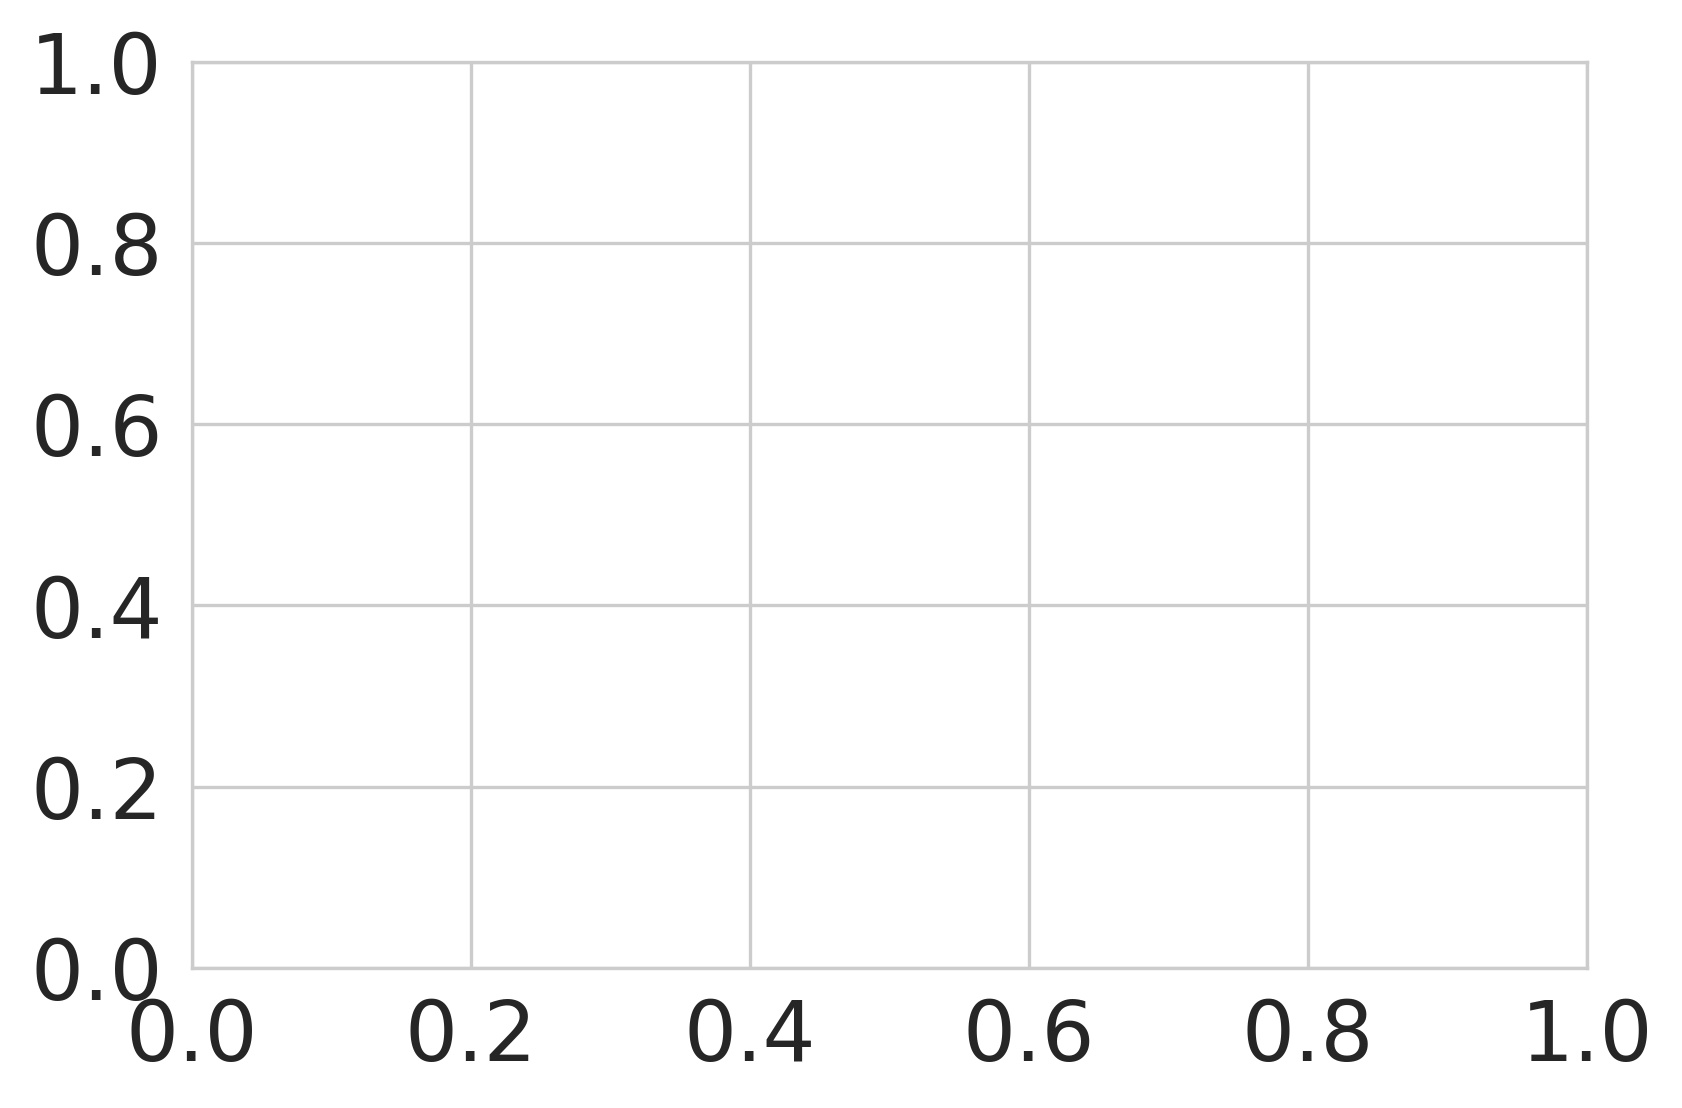

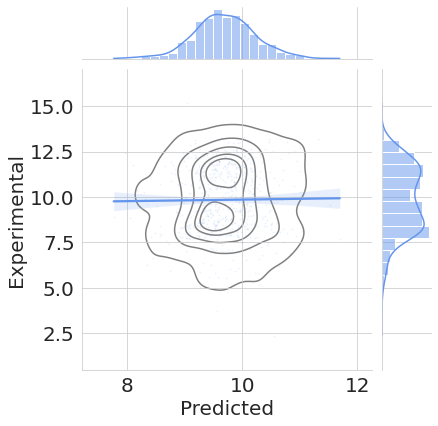

Metrics over folds: 
	Average r2:  0.001380409240816236
	Std of r2:  0.0011176442443238796
	Overall r2: 0.00016239476462612474, Average r2 over folds: 0.001380409240816236
Fitting final model now...
Train on 556 samples, validate on 62 samples
Epoch 1/10
556/556 [==============================] - 0s 396us/sample - loss: 0.2795 - mean_squared_error: 0.2795 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 2/10
556/556 [==============================] - 0s 96us/sample - loss: 0.2301 - mean_squared_error: 0.2301 - val_loss: 0.2164 - val_mean_squared_error: 0.2164
Epoch 3/10
556/556 [==============================] - 0s 88us/sample - loss: 0.2203 - mean_squared_error: 0.2203 - val_loss: 0.2510 - val_mean_squared_error: 0.2510
#################################################################################################
##############################            RUNNING AUTOKERAS           ###########################
################################################################

In [4]:
os.mkdir('./ckpt/output/R_CDS/')

data_folder = './AutoML_Data_Process/data/'
data_file = 'R_CDS.csv'
input_col = 'Seq'
target_col = 'OD'
sequence_type = 'nucleic_acid'
verbosity = 1
task = 'regression' # binary_classification, multiclass_classification, regression

# Specify target folders for saving models and results
# Generic here - will add the tags specifying classification/regression
# as well as specific for the AutoML tool being used (i.e. /tpot/)
model_folder = './ckpt/output/R_CDS/models/'
output_folder = './ckpt/output/R_CDS/outputs/'

run_bioautomated(task, data_folder, data_file, sequence_type, model_folder, output_folder, input_col=input_col, target_col=target_col, max_runtime_minutes=max_runtime_minutes, num_folds=num_folds, verbosity=verbosity, num_final_epochs=num_final_epochs, yaml_params=yaml_params, num_generations=num_generations, population_size=population_size)
